In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


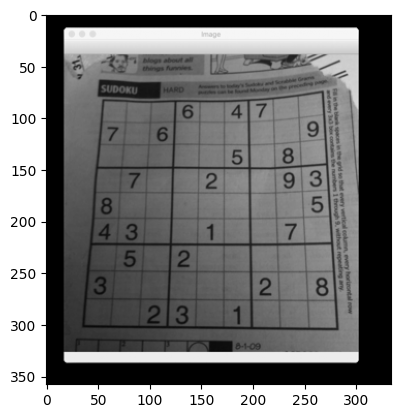

In [88]:
img=cv2.imread("/content/image.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap="gray")


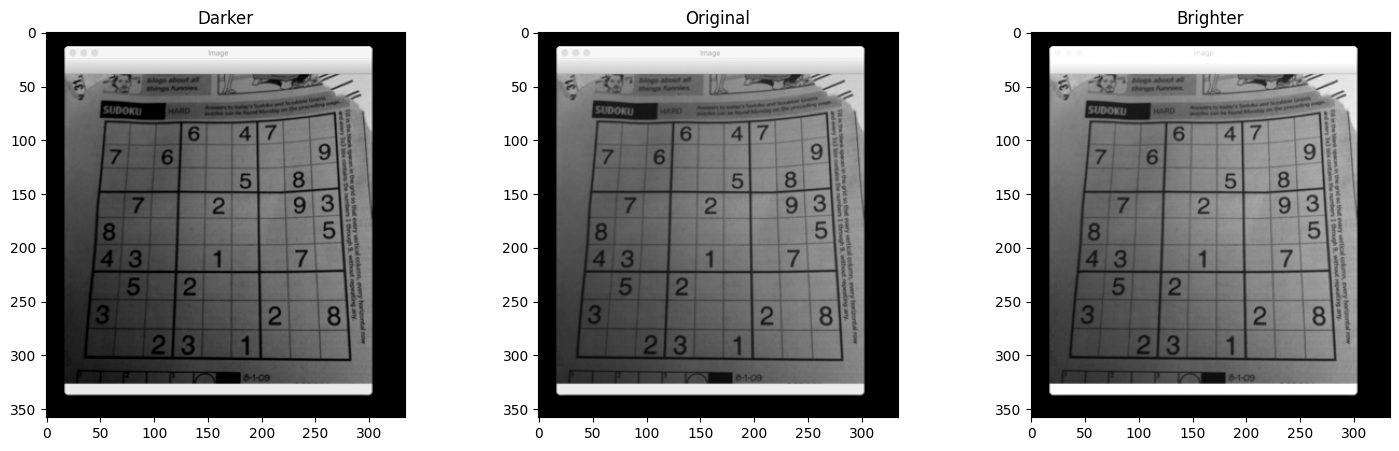

In [89]:
matrix = np.ones(img.shape, dtype="uint8") * 25

img_brighter = cv2.add(img, matrix)
img_darker   = cv2.subtract(img, matrix)
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_darker,cmap="gray");  plt.title("Darker");
plt.subplot(132); plt.imshow(img,cmap="gray");         plt.title("Original");
plt.subplot(133); plt.imshow(img_brighter,cmap="gray");plt.title("Brighter");

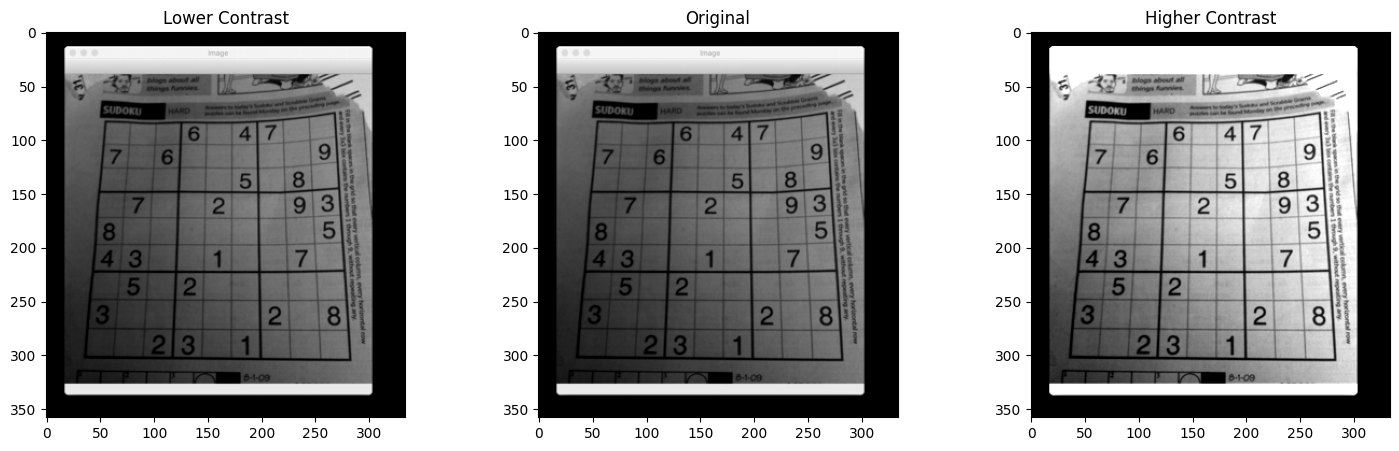

In [ ]:
matrix_low_contrast = np.ones(img.shape) * 0.8
matrix_high_contast = np.ones(img.shape) * 1.2

new_img = img_darker.copy()

img_lower   = np.uint8(cv2.multiply(np.float64(new_img), matrix_low_contrast))
img_higher = np.uint8(np.clip(cv2.multiply(np.float64(new_img), matrix_high_contast), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower,cmap="gray"); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(new_img,cmap="gray");   plt.title("Original");
plt.subplot(133); plt.imshow(img_higher,cmap="gray");plt.title("Higher Contrast");

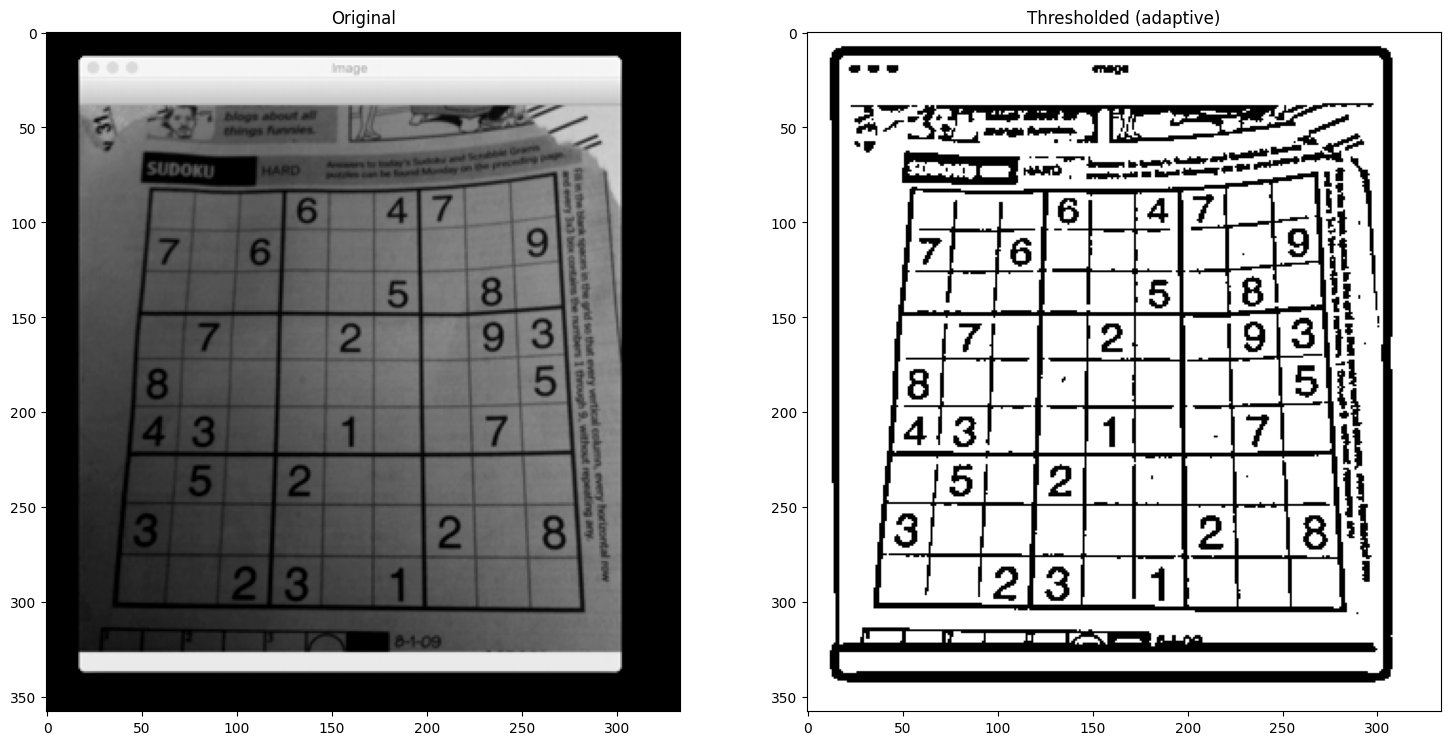

In [ ]:

new_img2 = new_img.copy()

img_thresh_adp = cv2.adaptiveThreshold(new_img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(new_img2,        cmap="gray");  plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

True

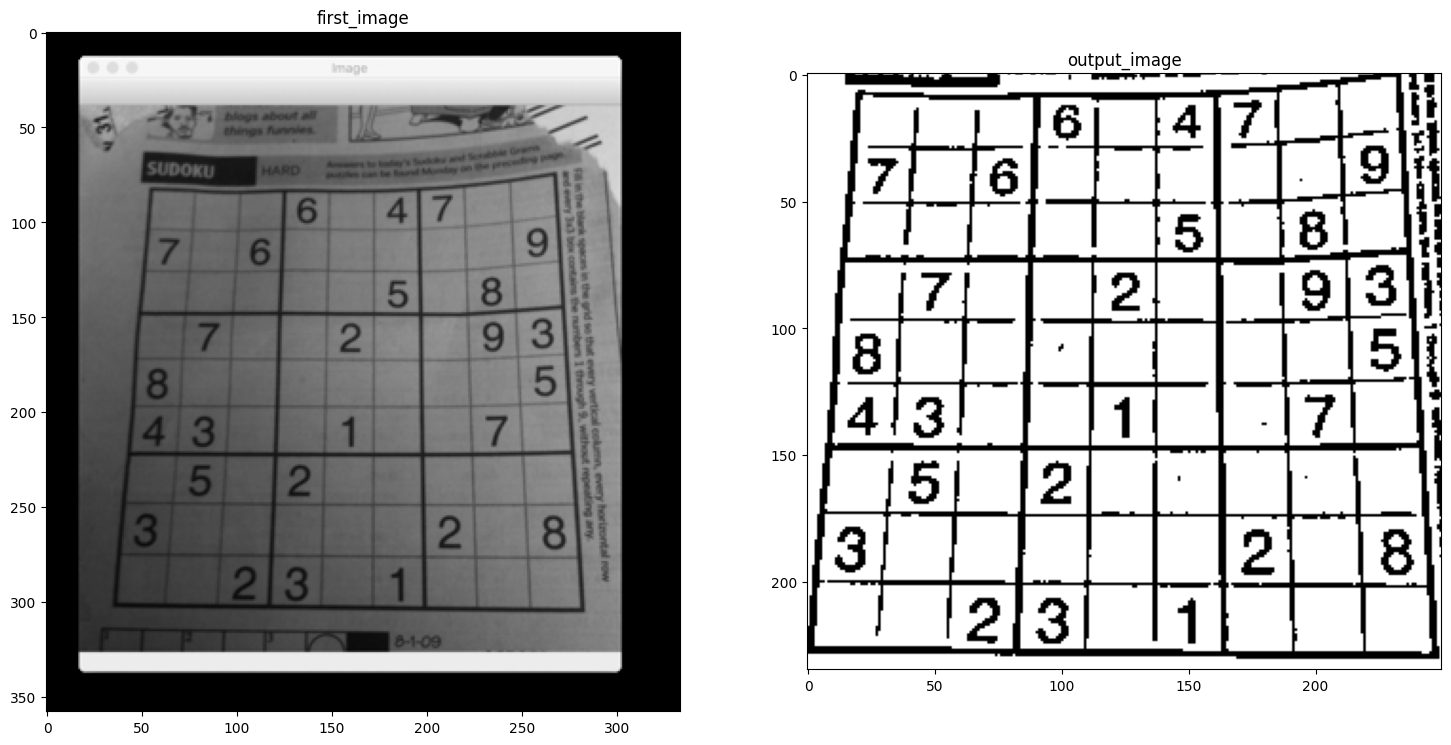

In [100]:
cropped_img = img_thresh_adp[75:310,35:285]

plt.figure(figsize=[18,15])
plt.subplot(121);plt.imshow(img, cmap="gray");  plt.title("first_image");
plt.subplot(122);plt.imshow(cropped_img ,cmap="gray");  plt.title("output_image");

cv2.imwrite("/content/output_image.png",cropped_img)